In [108]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', 100)

In [8]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [9]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
players = pd.DataFrame(json.loads(response.text)['elements'])
teams = pd.DataFrame(json.loads(response.text)['teams'])

In [23]:
players['name'] = players.first_name + ' ' + players.second_name

In [70]:
players_simple =  players[['name', 'id']]

In [83]:
data = []
for id in list(players_simple.sort_values('id').id):
    if id % 10 == 0:
        print(f'{id} of {len(players_simple)}')
    player_url = f'https://fantasy.premierleague.com/api/element-summary/{id}/'
    response = requests.get(player_url)
    data.extend(json.loads(response.text)['history'])
    
df = pd.DataFrame(data)

10 of 583
20 of 583
30 of 583
40 of 583
50 of 583
60 of 583
70 of 583
80 of 583
90 of 583
100 of 583
110 of 583
120 of 583
130 of 583
140 of 583
150 of 583
160 of 583
170 of 583
180 of 583
190 of 583
200 of 583
210 of 583
220 of 583
230 of 583
240 of 583
250 of 583
260 of 583
270 of 583
280 of 583
290 of 583
300 of 583
310 of 583
320 of 583
330 of 583
340 of 583
350 of 583
360 of 583
370 of 583
380 of 583
390 of 583
400 of 583
410 of 583
420 of 583
430 of 583
440 of 583
450 of 583
460 of 583
470 of 583
480 of 583
490 of 583
500 of 583
510 of 583
520 of 583
530 of 583
540 of 583
550 of 583
560 of 583
570 of 583
580 of 583
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   element            1153 non-null   int64 
 1   fixture            1153 non-null   int64 
 2   opponent_team      1153 non-null   int64 
 3   total_points       1153 

### Check Performance Against Expectations

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   element            1153 non-null   int64 
 1   fixture            1153 non-null   int64 
 2   opponent_team      1153 non-null   int64 
 3   total_points       1153 non-null   int64 
 4   was_home           1153 non-null   bool  
 5   kickoff_time       1153 non-null   object
 6   team_h_score       1153 non-null   int64 
 7   team_a_score       1153 non-null   int64 
 8   round              1153 non-null   int64 
 9   minutes            1153 non-null   int64 
 10  goals_scored       1153 non-null   int64 
 11  assists            1153 non-null   int64 
 12  clean_sheets       1153 non-null   int64 
 13  goals_conceded     1153 non-null   int64 
 14  own_goals          1153 non-null   int64 
 15  penalties_saved    1153 non-null   int64 
 16  penalties_missed   1153 non-null   int64 


In [90]:
df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,name,id
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,45,0,23970,0,0,Cédric Alves Soares,1
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,44,-5169,24193,1361,6530,Cédric Alves Soares,1
2,2,4,12,0,True,2022-08-06T11:30:00Z,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,45,0,116351,0,0,Bernd Leno,2
3,2,20,20,0,False,2022-08-13T14:00:00Z,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,45,-7183,129089,5642,12825,Bernd Leno,2
4,3,1,7,2,False,2022-08-05T19:00:00Z,0,2,1,90,0,0,1,0,0,0,0,1,0,0,0,12,16.6,15.0,2.0,3.4,50,0,48303,0,0,Granit Xhaka,3


In [88]:
df = df.merge(players_simple, left_on='element', right_on='id')

In [93]:
df = df[['name', 'round', 'kickoff_time', 'goals_conceded', 'assists', 'goals_scored', 'bonus', 'total_points']]

In [97]:
df['kickoff_time'] = pd.to_datetime(df.kickoff_time.str[:10])

In [98]:
spo = pd.read_pickle('../data/historical/2022_08_12/simulated_player_outcomes.pkl')

In [100]:
spo.head()

,name,web_name,team,pos,now_cost,minutes,match_date,proba_assist,proba_goal,assist_share,goal_share,mean_assists,mean_goals,mean_goals_against
0,Granit Xhaka,Xhaka,Arsenal,3,50,90,2022-08-13,0.144578,0.129496,0.052530,0.038309,0.1061,0.0799,1.0833
1,Thomas Partey,Partey,Arsenal,3,50,90,2022-08-13,0.114286,0.125589,0.041524,0.037153,0.0871,0.0811,1.0833
2,Martin Odegaard,Ødegaard,Arsenal,3,65,90,2022-08-13,0.301508,0.279938,0.109547,0.082813,0.2307,0.1715,1.0833
3,Kieran Tierney,Tierney,Arsenal,2,50,7,2022-08-13,0.209302,0.080357,0.076046,0.023772,0.1569,0.0486,1.0833
4,Nicolas Pepe,Pépé,Arsenal,3,54,0,2022-08-13,0.243902,0.327749,0.088618,0.096958,0.1841,0.2036,1.0833


In [102]:
spo = spo.merge(df, left_on=['name', 'match_date'], right_on=['name', 'kickoff_time'])

In [105]:
def calculate_player_points(position, goals_against, assists, goals):
    total_points = 0
    total_points += assists * 3
    
    if position <=1:
        total_points += goals * 6
        
        if goals_against < 1:
            total_points += (1-goals_against) * 4
        
        elif goals_against >= 1:
            total_points -= goals_against/2
    
    if position == 2:
        total_points += goals * 5
        
        if goals_against < 1:
            total_points += 1
    
    if position == 3:
        total_points += goals * 4
        
    return total_points

In [106]:
# Fill na values for the goal keepers, who don't have goals/assist stats
spo.loc[spo.pos == 1] = spo[spo.pos == 1].fillna(0)
spo['x_points'] = spo.apply(lambda x: calculate_player_points(x.pos, x.mean_goals_against, x.mean_assists, x.mean_goals), axis=1)

In [110]:
spo = spo.drop(columns='kickoff_time')

<AxesSubplot:xlabel='total_points', ylabel='x_points'>

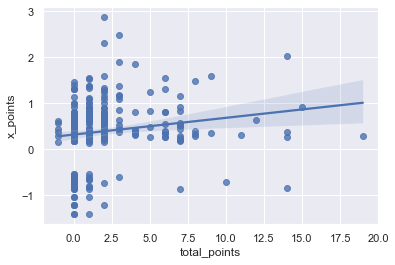

In [112]:
sns.set()
sns.regplot(data = spo, x='total_points', y='x_points')

In [113]:
spo.to_pickle('../data/historical/gw2_players_data.pkl')

In [ ]:
### Calculate Mean Squared Error

### Check Performance of Selected Teams

In [124]:
tst = pd.read_pickle('../data/historical/2022_08_12/team_selections_trials.pkl')

In [125]:
tst.head()

,name,team,pos,now_cost,minutes,match_date,mean_assists,mean_goals,mean_goals_against,x_points,gw_rank,selection,run
36,Ederson Santana de Moraes,Man City,1,55,90,2022-08-13,0.0000,0.0000,0.6741,1.3036,28.5,start,0.0
174,Trent Alexander-Arnold,Liverpool,2,75,90,2022-08-15,0.3054,0.1135,0.8377,2.4837,2.0,start,0.0
173,Andrew Robertson,Liverpool,2,70,90,2022-08-15,0.2954,0.0863,0.8377,2.3177,3.0,start,0.0
186,Joao Cancelo,Man City,2,70,90,2022-08-13,0.2117,0.0779,0.6741,2.0246,6.0,start,0.0
180,Kyle Walker,Man City,2,50,90,2022-08-13,0.1093,0.0452,0.6741,1.5539,11.0,start,0.0


In [126]:
tst = tst.merge(df, how='left', left_on=['name', 'match_date'], right_on=['name', 'kickoff_time'])

In [127]:
tst.groupby(['run', 'selection'])['total_points'].sum().reset_index()

,run,selection,total_points
0,0.0,start,34.0
1,0.0,sub,2.0
2,1.0,start,10.0
3,1.0,sub,6.0
4,2.0,start,23.0
5,2.0,sub,8.0
6,3.0,start,17.0
7,3.0,sub,14.0
8,4.0,start,31.0
9,4.0,sub,15.0


In [128]:
tst[tst.run == 0][['name', 'selection', 'x_points', 'total_points']]

,name,selection,x_points,total_points
0,Ederson Santana de Moraes,start,1.3036,6.0
1,Trent Alexander-Arnold,start,2.4837,3.0
2,Andrew Robertson,start,2.3177,2.0
3,Joao Cancelo,start,2.0246,NaN
4,Kyle Walker,start,1.5539,6.0
5,Mohamed Salah,start,2.8801,2.0
6,Bukayo Saka,start,1.5876,2.0
7,Goncalo Manuel Ganchinho Guedes,start,1.5055,NaN
8,Gabriel Martinelli Silva,start,1.4842,8.0
9,Pedro Lomba Neto,start,1.3756,3.0
